# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Hilmi Al FArisi
- **Email:** b25b9d032@student.devacademy.id / faris.workidea@gmail.com
- **ID Dicoding:** B25B9D032

## Menentukan Pertanyaan Bisnis

Pada submission ini, data yang digunakan adalah dasaet E-Commerce Public yang berisi berbagai data demografis pelanggan, penjual, produk, dan pemeasanan yang dapat dieksplore untuk menemukan insight bisnis. Pada proses analisis data ini bertujuan untuk menemukan insight dan jawaban dari pertanyaan bisnis yang saya tentukan sebagai berikut :

- Bagaimana distribusi rating bintang 5 di antara berbagai kategori produk?
- Bagaimana faktor volume dan berat barang berkontribusi terhadap besarnya harga pengiriman barang?
- Bagaimana distribusi angka pembelian di berbagai lokasi geografis, dan area mana yang menunjukkan pembelian tertinggi serta terendah?
- Bagaimana tingkat loyalitas pelanggan berdasarkan recency, frekuensi, dan total belanja, dan siapa saja yang termasuk dalam kategori pelanggan top?


## Import Semua Packages/Library yang Digunakan

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point


## Data Wrangling

### Gathering Data

In [42]:
customer_df = pd.read_csv('./Data/customers_dataset.csv')
order_df = pd.read_csv('./Data/orders_dataset.csv')
order_payment_df = pd.read_csv('./Data/order_payments_dataset.csv')
order_review_df = pd.read_csv('./Data/order_reviews_dataset.csv')
product_df = pd.read_csv('./Data/products_dataset.csv')
geolocation_df = pd.read_csv('./Data/geolocation_dataset.csv')
order_item_df = pd.read_csv('./Data/order_items_dataset.csv')


**Insight:**
- Data Order mempunyai beberapa dataset setipe di antaranya order_item, order_review, dan order payment yang bisa dimerge untuk mendapatkan informasi lengkap terkait pemesanan;
- Data order yang lengkap mempunyai beberapa foreign key diantaranya column product_id untuk data product, column seller_id untuk data seller, column customer_id untuk data customer;
- Data customer mempunyai foreign key dengan data geolocation yaitu column geolocation_zip_code_prefix untuk mendapatkan data lokasi tiap customer;
- Terdapat 99440 data pemesanan sejak September 2016 hingga Oktober 2018;
- Data yang ada cukup representatif untuk dianalisis demi menjawab pertanyaan-pertanyaan di atas.


### Assessing Data

In [43]:
# Assesing Data order_df (Check missing value, dan tipe data)
order_df.info()
order_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [44]:
# Assesing Data order_payment_df (Check missing value, dan tipe data)
order_payment_df.info()
order_payment_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [45]:
# Assesing Data order_review_df (Check missing value, dan tipe data)
order_review_df.info()
order_review_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [46]:
# Assesing Data customer_df (Check missing value, dan tipe data)
customer_df.info()
customer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [47]:
# Assesing Data product_df (Check missing value, dan tipe data)
product_df.info()
product_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [48]:
# Assesing Data geolocation_df (Check missing value, dan tipe data)
geolocation_df.info()
geolocation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [49]:
# Assesing Data order_item_df (Check missing value, dan tipe data)
order_item_df.info()
order_item_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [50]:
# Check data duplicate order_df
order_df.duplicated().sum()

np.int64(0)

In [51]:
# Check data duplicate order_payment_df
order_payment_df.duplicated().sum()

np.int64(0)

In [52]:
# Check data duplicate order_review_df
order_review_df.duplicated().sum()

np.int64(0)

In [53]:
# Check data duplicate customer_df
customer_df.duplicated().sum()

np.int64(0)

In [54]:
# Check data duplicate product_df
product_df.duplicated().sum()

np.int64(0)

In [55]:
# Check data duplicate geolocation_df
geolocation_df.duplicated().sum()

np.int64(261831)

In [56]:
# Check data duplicate order_item_df
order_item_df.duplicated().sum()

np.int64(0)

**Insight:**
1. Temuan Missing Value
- Terdapat missing value pada order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date pada data order. Namun ketiga kolom tersebut tidak berhubungan dengan pertanyaan bisinis yang akan diexplore.
- Terdapat missing value pada review_comment_title dan review_comment_massage pada data order_review. Namun ketiga kolom tersebut tidak berhubungan dengan pertanyaan bisinis yang akan diexplore.
- Terdapat missing value pada product_cat_name, length, description_length, photos, dan berbagai ukuran produk pada data order_item. Beberapa kolom yang berkaitan dengan ukuran dan berat produk berkaitan dengan kualitas hasil analisis ini.

2. Temuan kesalahan tipe data
- Seluruh tipe data pada semua kolom sudah sesuai kecuali pada order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date pada data order yang seharusnya datettime namun aktualnya object. Namun ketiga kolom tersebut tidak berhubungan dengan pertanyaan bisinis yang akan diexplore.

3. Temuan data duplikat
- Dapat duplikat terdeteksi hanya pada data geolocation, namun hal tersebut wajar karena perbedaan hanya minor terdapat pada koordinat longitude dan latitude yang sebenarnya memang menjadi kolom pembeda pada pertanyaan analisis kita.

4. Tidak ditemukan adanya *outliers/inaccurate value* pada data-data di atas
5. Ditemukan data invalid dalam kolom longitude dan latitude pada data geolocation yang berada di luar wilayah negara Brazil

### Cleaning Data

In [57]:
# Karena missing value kolom-kolom yang berkaitan dengan ukuran dan berat produk seperti weight, length, height, dan width hanya 0,01%, maka saya akan ganti dengan mean agar tidak merusak nilai distribusi

product_df.fillna({
    'product_weight_g': product_df['product_weight_g'].mean(),
    'product_length_cm': product_df['product_length_cm'].mean(),
    'product_height_cm': product_df['product_height_cm'].mean(),
    'product_width_cm': product_df['product_width_cm'].mean()
}, inplace=True)

In [58]:
# Karena missing value kolom-kolom tanggal pada data order seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date, tidak akan terpakai, maka kolom-kolom tersebut akan saya drop
for col in ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
  order_df.drop(col, axis=1, inplace=True)


In [59]:
# Karena missing value pada data order_review juga tidak terpakai, maka saya akan drop kolom-kolom tersebut
for col in ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']:
  order_review_df.drop(col, axis=1, inplace=True)

In [60]:
# Memfilter koordinat yang hanya berada dalam batas koordinat wilayah negara brazil
geolocation_df = geolocation_df[
    (geolocation_df['geolocation_lat'].between(-35, 5)) &
    (geolocation_df['geolocation_lng'].between(-74, -34))
]

**Insight:**
- Missing value terkait ukuran dan berat produk diisi dengan nilai mean karena jumlah tidak signifikan dan tidak akan merubah distribusi data
- Beberapa kolom tanggal pada data order kecuali order_purchase_timestamp dan beberapa kolom pada data order_review dihilangkan agar dataset lebih rapih dan clean
- Beberapa data geolocation dengan anga koordinat longitude dan latitude di luar wilayah negara brazil dihilangkan

## Exploratory Data Analysis (EDA)

### Explore data Product Review

In [61]:
product_orderItem_df = pd.merge(
    left=product_df,
    right=order_item_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

product_review_df = pd.merge(
    left=product_orderItem_df,
    right=order_review_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
# Melihat product dengan review bintang 5 terbanyak
product_with_R5_df = product_review_df[product_review_df['review_score'] == 5]
topProduct_with_R5_df = product_with_R5_df.groupby(['product_category_name']).size().reset_index(name='count_5stars').sort_values('count_5stars', ascending=False)
topProduct_with_R5_df.head(10)

,product_category_name,count_5stars
11,beleza_saude,5858
13,cama_mesa_banho,5785
32,esporte_lazer,5121
54,moveis_decoracao,4452
44,informatica_acessorios,4200
71,utilidades_domesticas,3985
66,relogios_presentes,3331
12,brinquedos,2517
40,ferramentas_jardim,2478
8,automotivo,2381


In [62]:
# Distribusi rating bintang 5 di tiap kategori produk
topProduct_with_R5_df['percentage_5stars'] = (
    topProduct_with_R5_df['count_5stars'] / topProduct_with_R5_df['count_5stars'].sum()
) * 100
topProduct_with_R5_df.style.format({'percentage_5stars': '{:.1f}%'})

,product_category_name,count_5stars,percentage_5stars
11,beleza_saude,5858,9.3%
13,cama_mesa_banho,5785,9.2%
32,esporte_lazer,5121,8.2%
54,moveis_decoracao,4452,7.1%
44,informatica_acessorios,4200,6.7%
71,utilidades_domesticas,3985,6.4%
66,relogios_presentes,3331,5.3%
12,brinquedos,2517,4.0%
40,ferramentas_jardim,2478,4.0%
8,automotivo,2381,3.8%


### Explore data potensial variabel yang berkorelasi dengan harga pengiriman barang

In [63]:
order_wtItem = pd.merge(
    left=order_df,
    right=order_item_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

freightFactor_df = pd.merge(
    left=order_wtItem,
    right=product_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

# Membuat kolom volume (len*width*height)
freightFactor_df['volume'] = freightFactor_df['product_length_cm'] * freightFactor_df['product_width_cm'] * freightFactor_df['product_height_cm']
freightValue_factor_df = freightFactor_df.drop(columns=['order_status', 'order_purchase_timestamp', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_category_name', 'seller_id'], axis=1)
freightValue_factor_df.head()

,order_id,customer_id,order_item_id,product_id,price,freight_value,product_weight_g,volume
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,500.0,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,400.0,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,420.0,9576.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,450.0,6000.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,250.0,11475.0


In [64]:
freightFactor_df['freight_value'].corr(freightFactor_df['volume'])

np.float64(0.5872681017261773)

In [65]:
freightFactor_df['freight_value'].corr(freightFactor_df['product_weight_g'])

np.float64(0.6104100183276739)

### Explorasi data lokasi pelanggan dengan pembelian tertinggi (Geospatial Analysis)

In [66]:
# Membuat dataframe angka pembelian tiap lokasi geografis
order_Withpayment = pd.merge(
    left=order_df,
    right=order_payment_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

customer_order_Withpayment = pd.merge(
    left=customer_df,
    right=order_Withpayment,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

customer_geolocation_df = pd.merge(
    left=customer_order_Withpayment,
    right=geolocation_df,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

geoloc_payment_df = customer_geolocation_df.groupby(['customer_zip_code_prefix'], as_index=False).agg({
    'geolocation_lat' : 'mean',
    'geolocation_lng' : 'mean',
    'payment_value' : 'sum',
    'geolocation_city' : 'first',
    'geolocation_state' : 'first'
})

new_order_df = pd.merge(
    left=freightFactor_df,
    right=order_review_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

new_order_Wcust_df = pd.merge(
    left=new_order_df,
    right=customer_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

main_data_df = pd.merge(
    left=new_order_Wcust_df,
    right=geoloc_payment_df,
    how='left',
    left_on='customer_zip_code_prefix', right_on='customer_zip_code_prefix')

geo_city_df = main_data_df.groupby(['geolocation_city'], as_index=False).agg({
    'geolocation_lat' : 'mean',
    'geolocation_lng' : 'mean',
    'payment_value' : 'sum',
})

geo_city_df.sort_values(by='payment_value', ascending=False).head(10)

,geolocation_city,geolocation_lat,geolocation_lng,payment_value
3189,rio de janeiro,-22.923655,-43.322488,1.925127e+10
456,belo horizonte,-19.909833,-43.956478,5.181659e+09
2494,niteroi,-22.896787,-43.084038,4.953803e+09
2495,niterói,-22.893820,-43.088127,3.287359e+09
3609,sao paulo,-23.572193,-46.631829,2.801052e+09
3456,santos,-23.963681,-46.327304,2.510985e+09
4012,uberlandia,-18.915508,-48.272994,2.111901e+09
1198,divinopolis,-20.143285,-44.888707,1.775232e+09
4140,vila velha,-20.361000,-40.309125,1.486841e+09
715,campinas,-22.902281,-47.075200,1.338043e+09


In [67]:
geo_city_df.sort_values(by='payment_value', ascending=True).head(10)

,geolocation_city,geolocation_lat,geolocation_lng,payment_value
491,boa ventura,-21.207949,-41.889774,31.69
3990,tuparece,-19.893237,-43.986305,31.73
1957,jardim abc de goias,-21.467829,-56.171869,34.09
2884,pinhal da serra,-30.233661,-50.233574,35.00
692,cambiasca,-21.714720,-41.925000,38.09
2800,pedra menina,-21.358677,-46.150543,38.50
3733,silveira carvalho,-23.543365,-46.889442,42.27
2402,monte bonito,-31.638807,-52.415534,50.34
2976,ponto do marambaia,-9.290888,-44.954423,57.60
354,baguari,-18.871945,-41.963082,64.10


### Explorasi Data RFM Customer (RFM Analysis)

In [68]:
# Membuat main_data untuk RFM Analysis dan Dashboard
new_order_df = pd.merge(
    left=freightFactor_df,
    right=order_review_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

new_order_Wcust_df = pd.merge(
    left=new_order_df,
    right=customer_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

main_data_df = pd.merge(
    left=new_order_Wcust_df,
    right=geoloc_payment_df,
    how='left',
    left_on='customer_zip_code_prefix', right_on='customer_zip_code_prefix')

for_rfm_df = main_data_df.copy()
for_rfm_df.drop(columns=['seller_id',
                      'shipping_limit_date',
                      'product_name_lenght',
                      'product_description_lenght',
                      'product_photos_qty',
                      ], axis=1, inplace=True
                      )


for_rfm_df.rename(columns={'order_purchase_timestamp' : 'order_date'}, inplace=True)
for_rfm_df['order_date'] = pd.to_datetime(for_rfm_df['order_date'])

rfm_df = for_rfm_df.groupby(by='customer_unique_id', as_index=False).agg({
    'order_date' : 'max',
    'order_id' : 'count',
    'price' : 'sum'
    })
rfm_df.rename(columns={
    'order_date' : 'max_order_timestamp',
    'order_id' : 'frequency',
    'price' : 'monetary'
},inplace=True)
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])
recent_date = rfm_df['max_order_timestamp'].max()
rfm_df['recency'] = (recent_date - rfm_df['max_order_timestamp']).dt.days
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)

In [69]:
# Menyimpan main_data untuk pembuatan dashboard
main_data_df.to_csv('main_data_df.csv', index=False)


In [70]:
# Top customer dari sisi recency
rfm_df.sort_values(by='recency', ascending=True).head(10)

,customer_unique_id,frequency,monetary,recency
50975,87ab9fec999db8bd5774917de3cdf01c,1,0.0,0
14363,262e1f1e26e92e86375f86840b4ffd63,2,197.5,0
65954,af5454198a97379394cacf676e1e96cb,3,178.0,13
37382,634420a0ea42302205032ed44ac7fccc,2,65.0,16
58524,9bb92bebd4cb7511e1a02d5e50bc4655,1,0.0,18
70105,ba84da8c159659f116329563a0a981dd,3,76.0,21
58710,9c3af16efacb7aa06aa3bc674556c5d6,3,190.0,22
3193,08642cd329066fe11ec63293f714f2f8,2,170.0,27
89783,ef0103e9602d12594d19c2b666219bc1,3,0.0,30
72940,c1ee153508c6b785b491443a95ff364e,1,0.0,34


In [71]:
# Top customer dari sisi frequency
rfm_df.sort_values(by='frequency', ascending=False).head(5)

,customer_unique_id,frequency,monetary,recency
81722,d97b3cfb22b0d6b25ac9ed4e9c2d481b,24,1593.16,365
75269,c8460e4251689ba205045f3ea17884a1,24,4080.00,70
26075,4546caea018ad8c692964e3382debd19,21,31.80,457
39720,698e1cf81d01a3d389d96145f7fa6df8,20,1974.00,420
73664,c402f431464c72e27330a67f7b94d4fb,20,2000.00,237


In [72]:
# Top customer dari sisi monetary
rfm_df.sort_values(by='monetary', ascending=False).head(5)

,customer_unique_id,frequency,monetary,recency
3826,0a0a92112bd4c708ca5fde585afaa872,8,13440.0,383
81962,da122df9eeddfedc1dc1f5349a1a690c,2,7388.0,564
44447,763c8b1c9c68a0229c42c9fc6f662b93,4,7160.0,94
82808,dc4802a71eae9be1dd28f5d788ceb526,1,6735.0,611
26205,459bef486812aa25204be022145caa62,1,6729.0,83


**Insight:**
1. Ranking serta distribusi kategori dengan review bintang 5 terbanyak adalah :
- 1 : beleza_saude (9.3%)
- 2 : cama_mesa_banho (9.2%)
- 3 : esporte_lazer (8.2%)
- 4 : moveis_decoracao (7.1%)
- 5 : informatica_acessorios (6.7%)

2. Ditemui bahwa faktor volume mempunyai tingkatan **sedang** (0.587) dalam hal keberpengaruhan terhadap harga pengiriman, sedangkan faktor berat mempunyai tingkat **kuat** (0.610) dalam hal keberpengaruhan terhadap harga pengiriman.

3. Geospatial analysis ini bertujuan untuk memberikan hasil lokasi-lokasi dengan tingkat penjualan tertinggi. Top 5 lokasi geografis dengan total angka pembelian tertinggi terdapat pada daerah dengan zip_code 24220, 24230, 22790, 22631, dan 35500 dengan koordinat tertera pada tabel.

4. RFM Analysis ini bertujuan untuk memberikan hasil customer dengan tingkat loyalitas terbaik dari sisi recency, frequency, dan monetary. Didapatkan top 5 Pelanggan dengan tingkat loyalitas tertinggi dari sisi recency dengan recency 0, 1, 14,16, dan 18 hari. Selanjutnya didapatkan top 5 pelanggan dengan erforma tertinggi dari sisi recency dengan nilau frequency pembelian sebanyak 24, 24, 21, 20, dan 20 kali, terakhir didapatkan top 5 pelanggan dengan performa tertinggi dari sisi monetary dengan nilai jumlah harga pemnbelian dari range 6729.0 hingga 13440.0



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi rating bintang 5 di antara berbagai kategori produk?

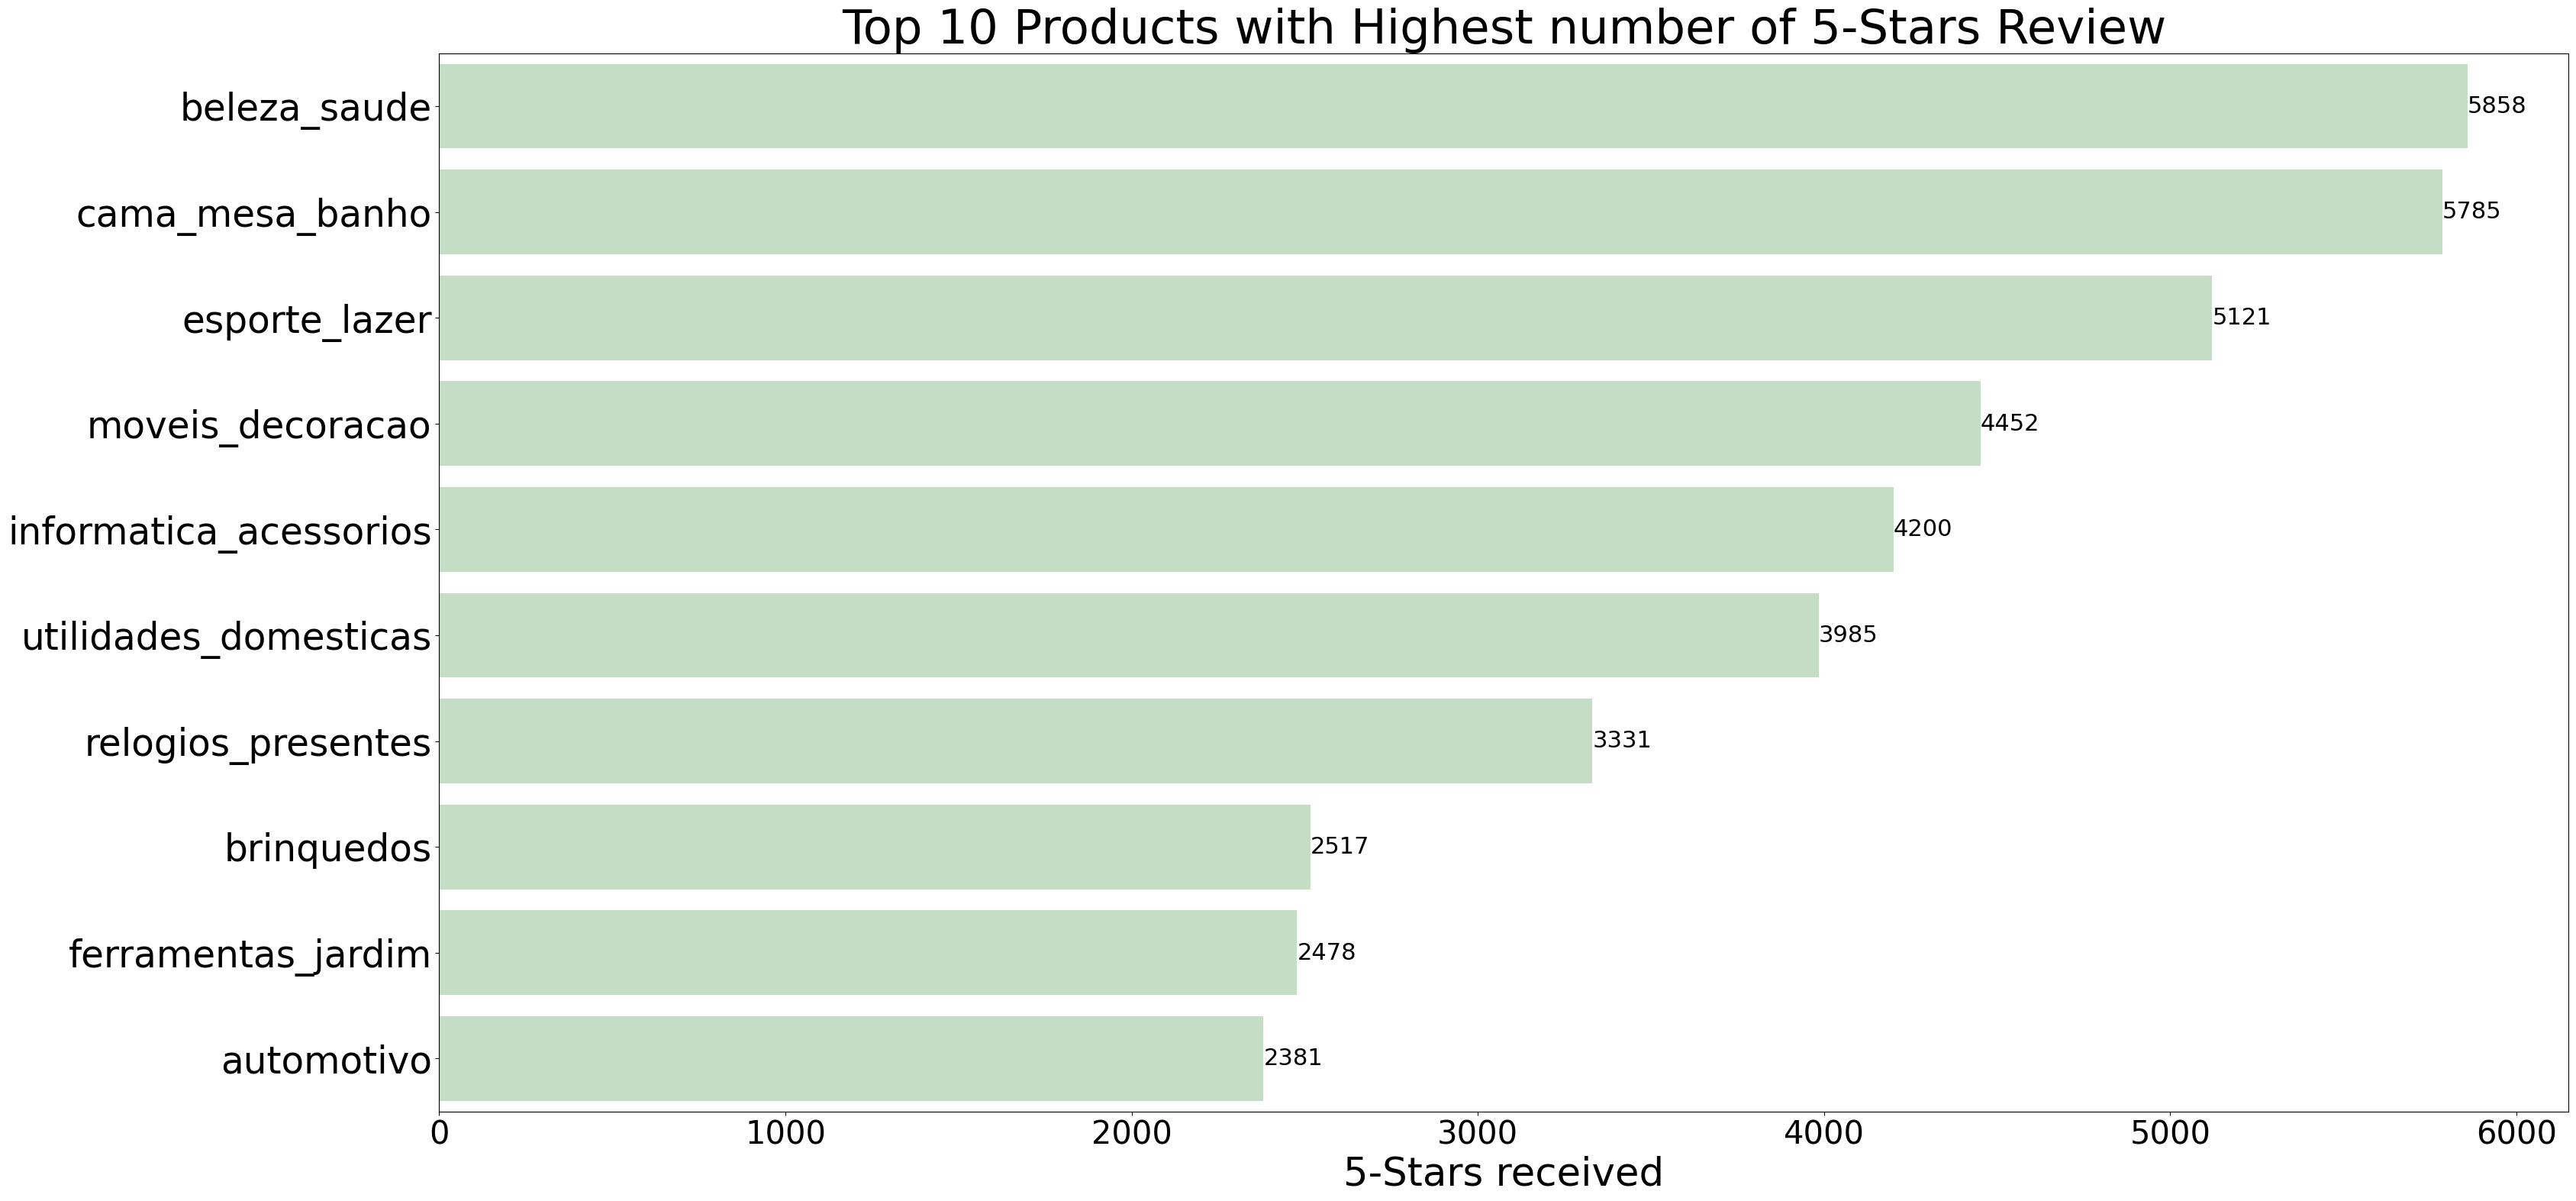

In [73]:
# Menggunakan dataframe product_review
topProduct_with_R5_df = product_with_R5_df.groupby(['product_category_name']).size().reset_index(name='count_5stars').sort_values('count_5stars', ascending=False)

colors_allblue = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]
fig, ax = plt.subplots(figsize=(36, 18))
sns.barplot(
    data=topProduct_with_R5_df.head(10),
    x='count_5stars',
    y='product_category_name',
    color='#C1E1C1',
    ax=ax
    )
ax.set_title('Top 10 Products with Highest number of 5-Stars Review', fontsize=45, loc='center')
ax.set_ylabel(None)
ax.set_xlabel('5-Stars received', fontsize=37)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=35)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=22, padding=0)
plt.show(fig)

### Pertanyaan 2: Bagaimana faktor volume dan berat barang berkontribusi terhadap besarnya harga pengiriman barang?

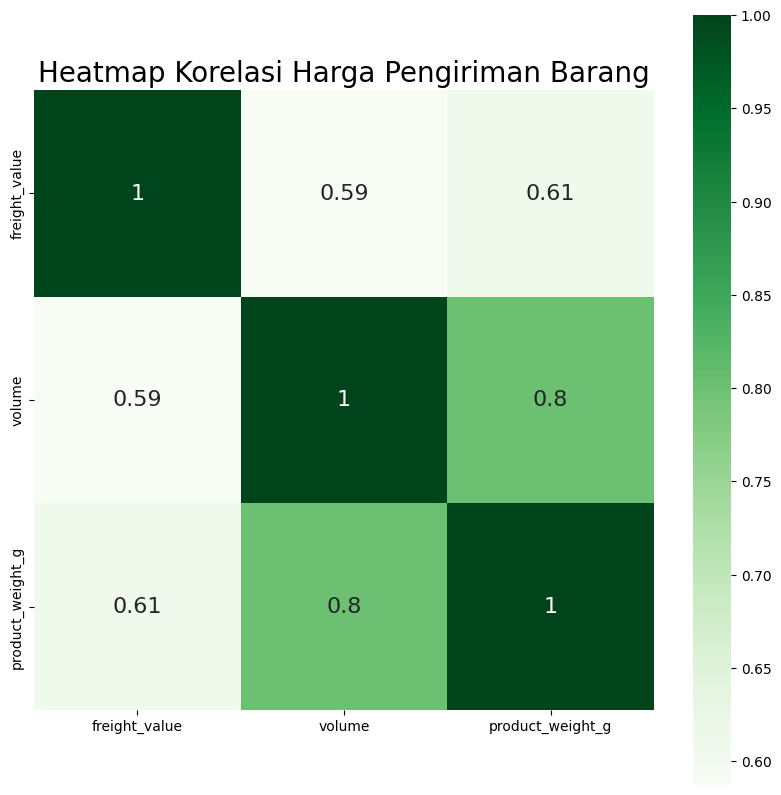

In [74]:
# Menggunakan dataframe freighValue_factor_df
corellation_data = freightValue_factor_df[['freight_value', 'volume', 'product_weight_g']]

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    data=corellation_data.corr(),
    annot=True,
    cmap='Greens',
    square=True,
    annot_kws={'size' : 16},
    ax=ax)
ax.set_title('Heatmap Korelasi Harga Pengiriman Barang', loc='center', fontsize=20)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show(fig)

### Pertanyaan 3 & Pertanyaan 4 akan divisualisasikan dengan analisis lanjutan pada Subpoint setelah ini

**Insight:**
- Barchart pertama meunjukan top 5 produk yang mendapatkan rating review bintang 5 dengan jumlah terbanyak

- Heatmap di atas menunjukan besaran korelasi / keberpengaruhan faktor berat dan volume product terhadap harga pengiriman barang

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Bagaimana distribusi angka pembelian di berbagai lokasi geografis, dan area mana yang menunjukkan pembelian tertinggi serta terendah?

<Axes: >

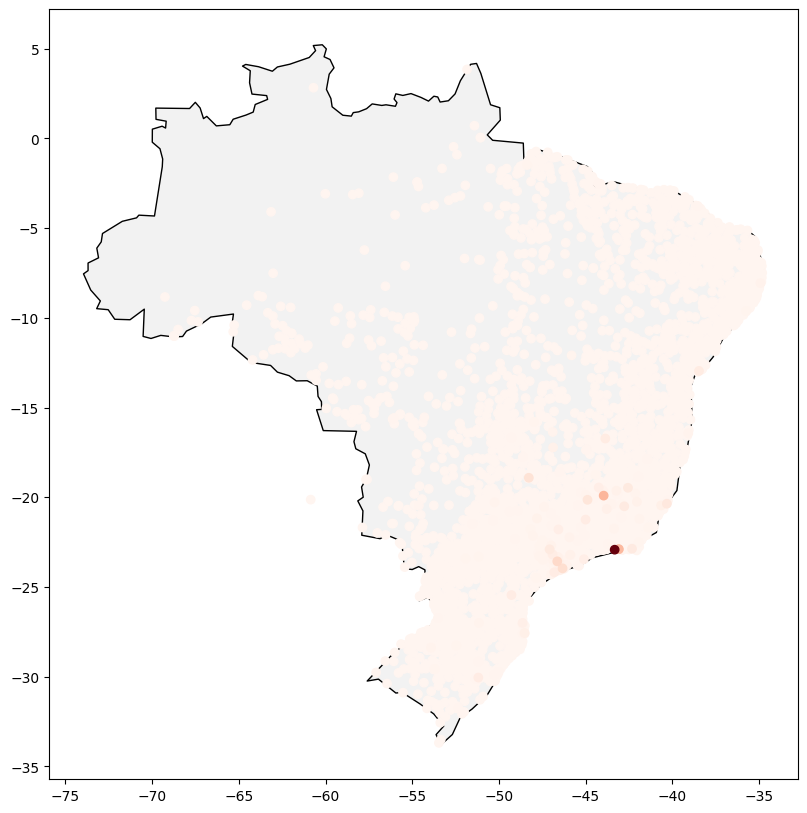

In [75]:
# Menggunakan dataframe geoloc_payment dengan menambahkan column geometry sebagai geospasial koordinat
geo_city_df = geo_city_df.sort_values(by='payment_value', ascending=True).reset_index(drop=True)
geometry = [Point(xy) for xy in zip(geo_city_df['geolocation_lng'], geo_city_df['geolocation_lat'])]

# Diurutkan dengan ascending=False agar visualisasi menunjukan data dengan payment value tertinggi berada di atas
geo_df = gpd.GeoDataFrame(data=geo_city_df, geometry=geometry)

geo_df.set_crs(epsg=4326, inplace=True)
#geo_df.crs = 4326

# Visualisasi Geospasial dengan Map Brazil yang menyesuaikan dengan isi data
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
brazil = world[world['NAME'] == 'Brazil']
brazil = brazil.to_crs(epsg=4326)
# brazil.crs = 4326


fig, ax = plt.subplots(figsize=(10, 10))
brazil.plot(figsize=(8, 8), color='#F2F2F2', edgecolor='black', ax=ax)
geo_df.plot(column='payment_value', ax=ax, cmap='Reds')

### Pertanyaan 4: Bagaimana tingkat loyalitas pelanggan berdasarkan recency, frekuensi, dan total belanja, dan siapa saja yang termasuk dalam kategori pelanggan top?

C:\Users\hp\AppData\Local\Temp\ipykernel_16288\4253369966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hp\AppData\Local\Temp\ipykernel_16288\4253369966.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hp\AppData\Local\Temp\ipykernel_16288\4253369966.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


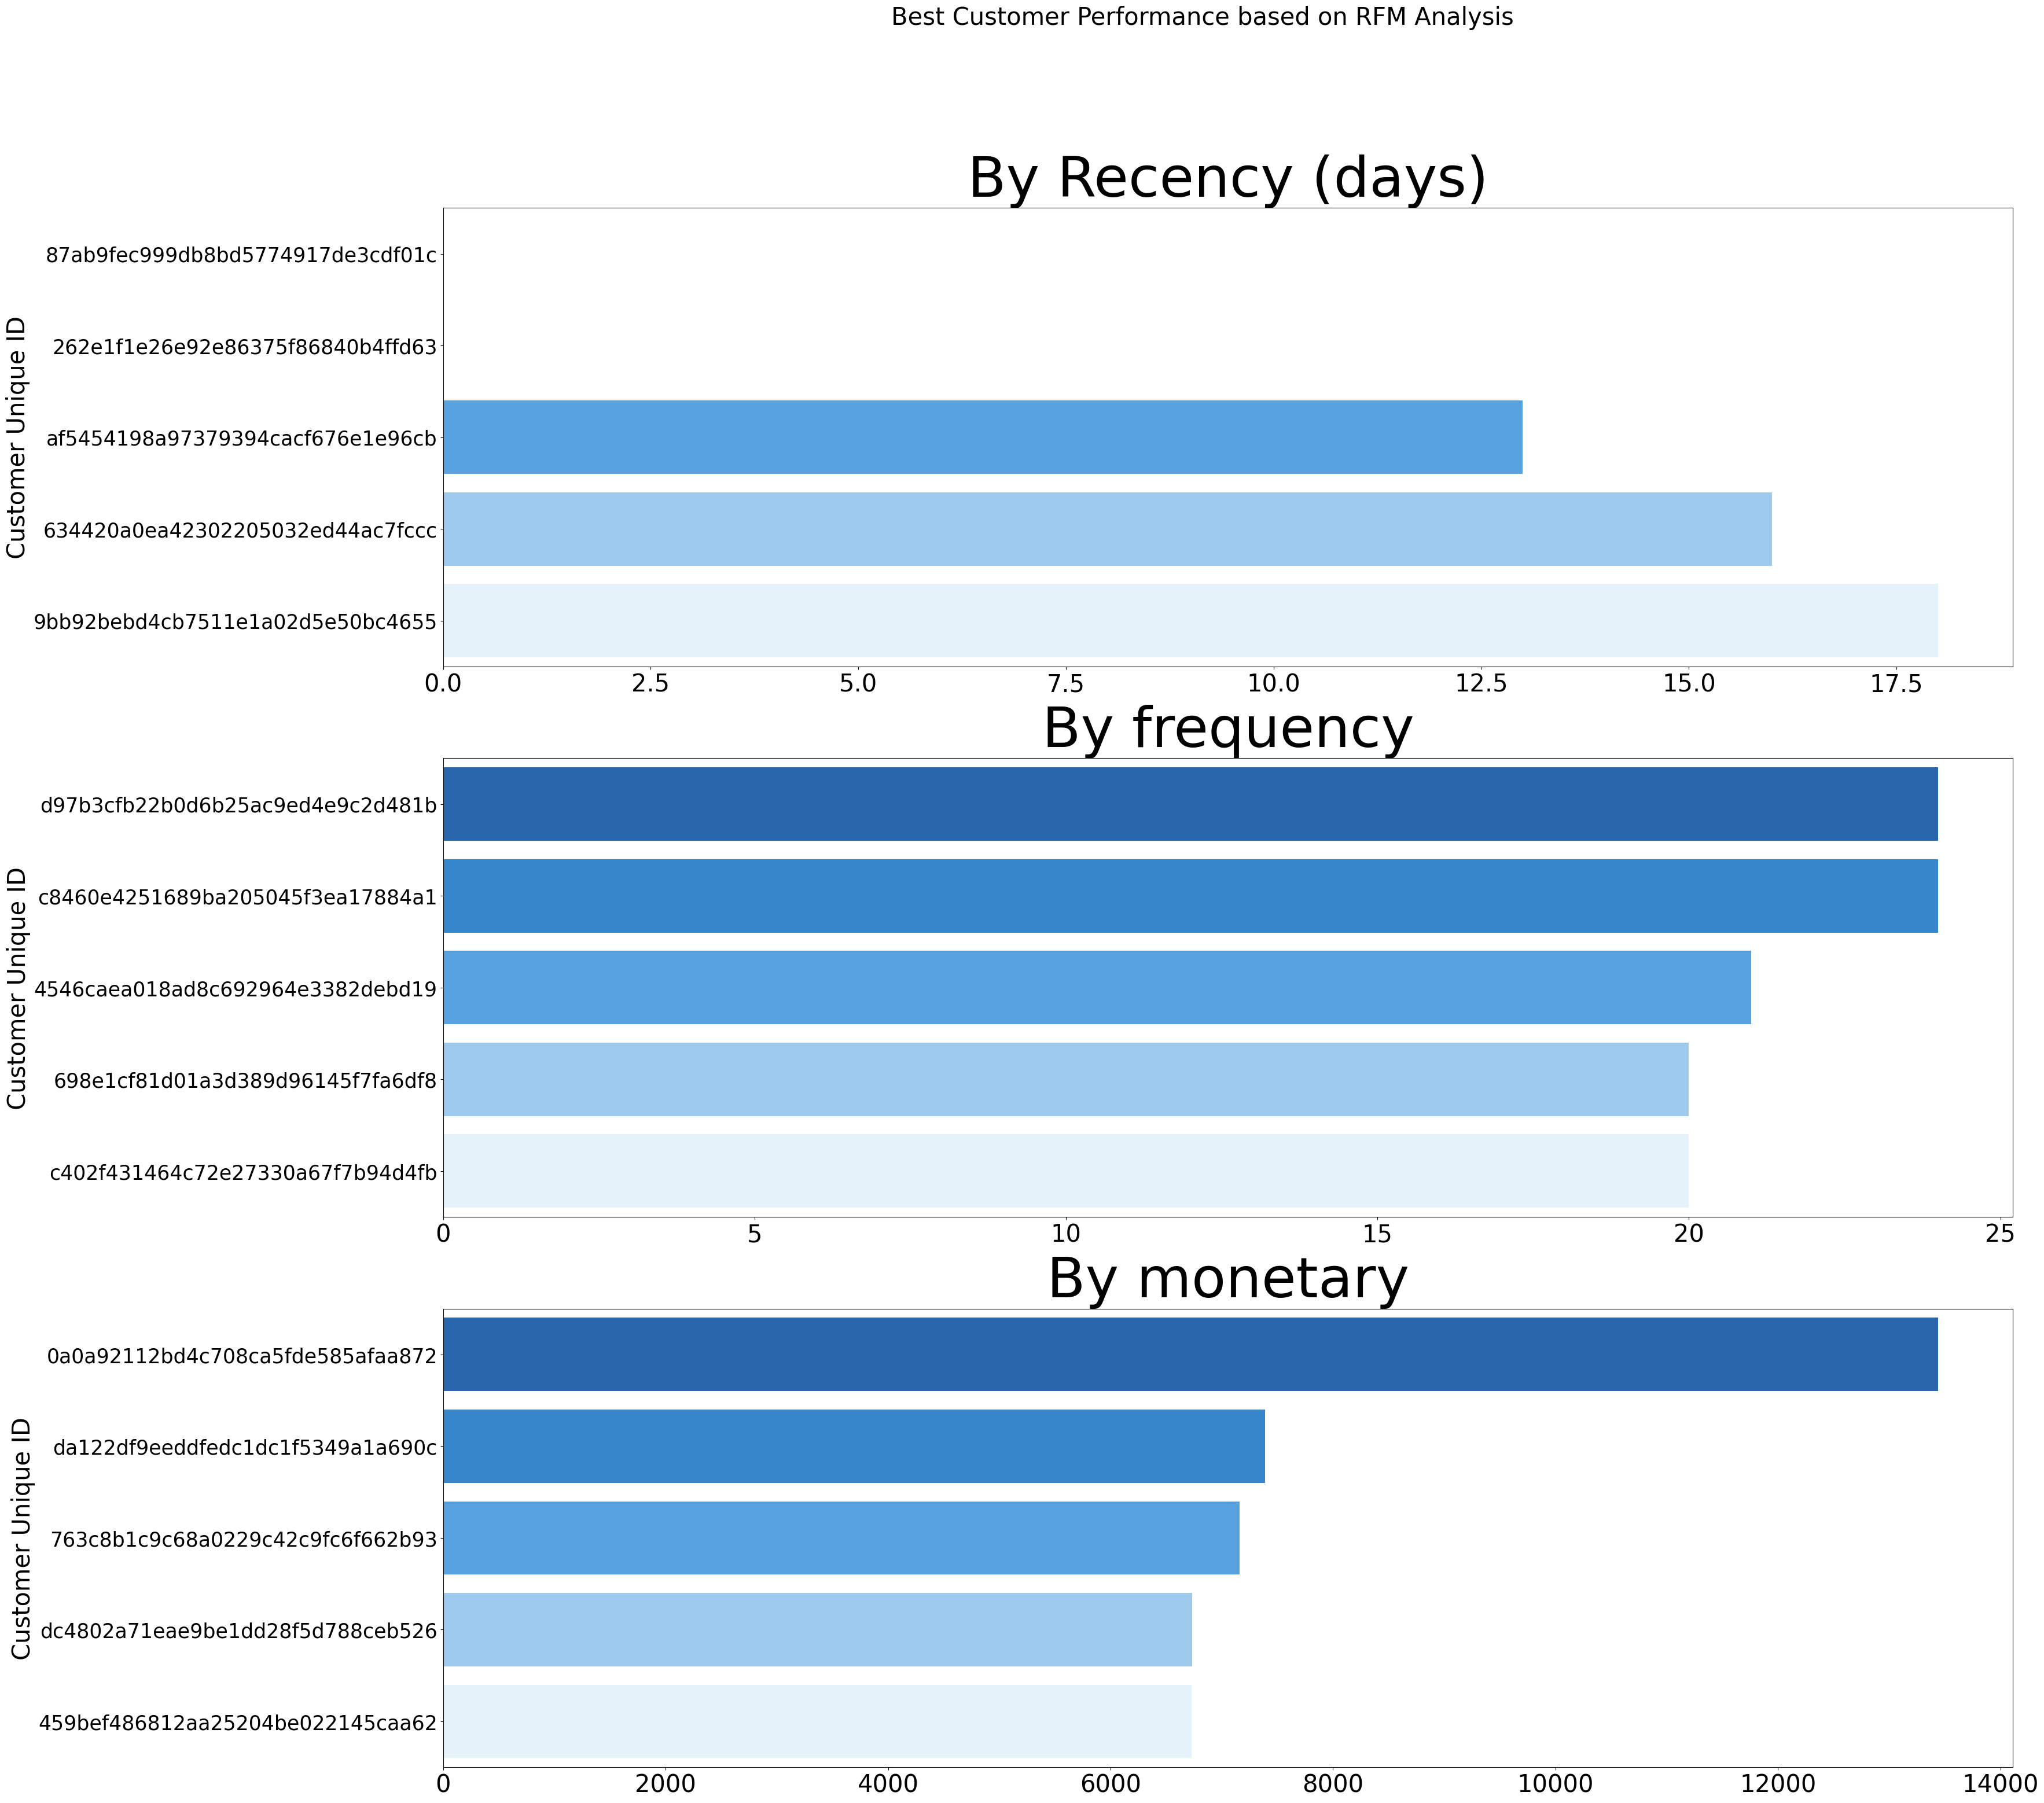

In [76]:
# Menggunakan dataframe RFM
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(35, 35))
plt.subplots_adjust(wspace=0.3)
fig.suptitle('Best Customer Performance based on RFM Analysis', fontsize=30)
sns.barplot(
    data=rfm_df.sort_values(by='recency', ascending=True).head(5),
    x='recency',
    y='customer_unique_id',
    palette= ['#1565c0', '#1e88e5', '#42a5f5', '#90caf9', '#e3f2fd'],
    ax=ax[0],
)
ax[0].set_title('By Recency (days)',loc='center', fontsize=70)
ax[0].set_xlabel(None)
ax[0].set_ylabel('Customer Unique ID', fontsize=30)
ax[0].tick_params(axis='x', labelsize=30)
ax[0].tick_params(axis='y', labelsize=25)

sns.barplot(
    data=rfm_df.sort_values(by='frequency', ascending=False).head(5),
    x='frequency',
    y='customer_unique_id',
    palette=['#1565c0', '#1e88e5', '#42a5f5', '#90caf9', '#e3f2fd'],
    ax=ax[1],
)
ax[1].set_title('By frequency',loc='center', fontsize=70)
ax[1].set_xlabel(None)
ax[1].set_ylabel('Customer Unique ID', fontsize=30)
ax[1].tick_params(axis='x', labelsize=30)
ax[1].tick_params(axis='y', labelsize=25)

sns.barplot(
    data=rfm_df.sort_values(by='monetary', ascending=False).head(5),
    x='monetary',
    y='customer_unique_id',
    palette=['#1565c0', '#1e88e5', '#42a5f5', '#90caf9', '#e3f2fd'],
    ax=ax[2],
)
ax[2].set_title('By monetary',loc='center', fontsize=70)
ax[2].set_xlabel(None)
ax[2].set_ylabel('Customer Unique ID', fontsize=30)
ax[2].tick_params(axis='x', labelsize=30)
ax[2].tick_params(axis='y', labelsize=25)

plt.show(fig)

Insight :
- Visualisasi geospatial di atas menjukan lokasi-lokasi customer dengan jumlah pembelian tertinggi
- Ketiga Barchart di atas menunjukan top 5 customer yang diukur dari performana RFM

## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan hasil analisis pertanyaan pertama, 10 kategori yang mendapatkan jumlah rating bintang 5 terbanyak diantaranya : beleza_saude (5858), cama_mesa_banho (5785), esporte_lazer (5121), moveis_decoracao (4452), informatica_acessorios (4200), utilidades_domesticas (3985), relogios_presentes (3331), brinquedos (2517), ferramentas_jardim (2478), dan automotivo (2381). Hal ini menunjukan bahwa kategori-kategori produk tersebut mempunyai kualitas dan pelayanan penjualan yang sangat baik. Dengan hasil ini, perusahaan ecommerce dapat menjadikan ke-10 kategori produk ini sebagai acuan strategi peningkatan stok penjualan dan rekomendasi pada beranda ecommerce yang ditawarkan kepada setiap pelanggan.

- Conclution pertanyaan 2 :
Berdasarkan hasil analisis pertanyaan kedua, didapatkan nilai korelasi volume dan berat produk terhadap harga pengiriman barang sebesar 0.587 dan 0.610. Hal ini menunjukan keduanya memberikan keberpengaruhan korelasi positif sedang yang berarti setiap peningkatan angka volume dan berat akan meningkatkan harga pengiriman. Namun hubungan tersebut **Tidak Cukup Kuat** sehingga perlu melakukan analisis lebih lanjut terhadap variabel lain untuk dapat merancang strategi efesiensi harga pengiriman barang yang akan meningkatkan ketertarikan pelanggan.

- Conclution pertanyaan 3 : 
Berdasarkan hasil analisis pertanyaan ketiga, didapatkan lokasi-lokasi dengan angka pembelian tertinggi pada wilayah : Rio De Janeiro, Sao Paulo, Belo Horizonte, Niteroi, Curitiba, dan Santos yang mana merupakan kota-kota besar dan padat penduduk. Sedangkan lokasi-lokasi dengan angka pembelian terendah pada wilayah : érico cardoso, planaltina do paraná, leópolis, boa ventura, dan tuparece yang merupakan daerah-daerah rural dan pedalam. 
Hasil analisis ini mengindikasikan bahwa kelengkapan infrasturkur dan akses logistik sangat mempengaruhi angka pembelian. Dengan itu perusahaan dapat membuat strategi bisnis perencanaan logistik dan pembangunan gudang-gudang satelit pada daerah yang mempunyai tengkat pembelian kecil untuk meningkatkan angka penjualan.

- Conclution pertanyaan 4 : 
Berdasarkan hasil analisis RFM pertanyaan ke-empat, didapatkan top 5 loyal customer dengan range pembelian terakhir dari hari ini hanya hingga 18 hari yang lalu, top 5 customer berdasarkan frequency dengan range 20 s.d. 24 kali melakukan transaksi, dan top 5 customer berdasarkan jumlah harga pembelian dengan range harga 6729.0 hingga 1344.0. Perusahaan dapat membuat strategi program customer loyalis/royalis sebgai pelanggan utama serta juga pemberian penawaran ekslusif. Sebaliknya untuk customer yang mempunyai nilai RFM rendah dapat diberikan re-engagement campaign untuk memnacing customer-customer tersebut agar kembali aktif atau meningkatkan transaksi.




